

# Project: Investigate a Dataset - [TMDB movie dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

> The dataset is a movie dataset obtained from the movie database (TMDB). The dataset includes 10866 rows and and 21 features such as budget, revenue, popularity, runtime, cast and release year allowing for us to observe changes over time.


## Questions for Analysis:

### Question 1:
>How is runtime trending over time. Is it incresing or decreasing?

### Question 2:
>How is the percentage of movies making a loss changing over time?

### Question 3:
>Is there a relationship between vote average and profits?

### Question 4:
>What is the most popular month for movie releases?


In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling

In [2]:
#loading the tmdb-movies.csv file and observing the file to see which columns to keep

df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Assesing the data:
>Checking the datatypes of the columns and if there are null values

In [3]:
#checking the datatypes of each column and cheching if there are null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

-No null values were found in popularity, budget, revenue, runtime, release year or vote average.

#### Looking for duplicated movies or ids:

In [4]:
df[df.duplicated("id",False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


-One duplicated movie was found.

#### Looking for columns with errant data:

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#looking for movies with no budget
df[df.budget <= 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


-some movies have budget of zero and need to be removed when exploring relationships with budgets

-some movies have a runtime of zero and also need to be removed when exploring runtime relationships


### Data Cleaning 

#### Removing duplicate rows:

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
#making sure duplicates are removed
df.duplicated().sum()

0

#### Cleaning the unnecessary columns (imbd_id, homepage, tagline, keywords, overview, vote_count, budget_adj, revenue_adj):

In [9]:
df.drop(columns = ["imdb_id","homepage","tagline","keywords","overview","vote_count","budget_adj","revenue_adj"],
        inplace = True)

In [10]:
#checking that columns have been droped
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:
#### How is runtime trending over time?
>First: movies with a runtime of 0 will be droped

In [11]:
#dropping rows with runtime of zero
df_runtime_adj = df.drop(df[df.runtime == 0].index)

>Second: grouping movies by release year decade and calculate median runtime for each decade

In [13]:
def decade_calculator(df):
    '''
    Takes a dataframe as an input and converts the values of release_year into decades
    Outputs a series of decades
    '''
    return (df["release_year"]//10)*10

In [14]:
#calculate dacade for each movie release year
df_runtime_adj["release_decade"] = decade_calculator(df_runtime_adj)

# calculate median runtime for each decade
df_runtime_grouped = df_runtime_adj.groupby("release_decade").runtime.median()

df_runtime_grouped

release_decade
1960    109
1970    105
1980    101
1990    102
2000     98
2010     95
Name: runtime, dtype: int64

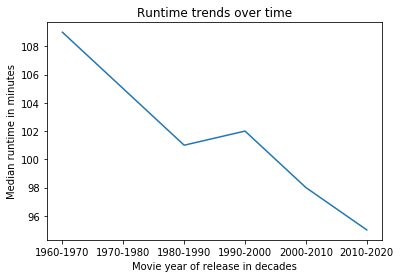

In [15]:
plt.plot(["1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020"], df_runtime_grouped)
plt.xlabel("Movie year of release in decades")
plt.ylabel("Median runtime in minutes")
plt.title("Runtime trends over time");


-Runtimes seem to be decreasing year after year

### Research Question 2:
#### How is the percentage of movies making a loss changing over time?

>First: movies with a budget or revenue that equals zero will be droped


In [16]:
#dropping rows with budget of zero
df_budget_adj = df[(df.budget != 0) & (df.revenue != 0)].copy()
df_budget_adj

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,8.0,2015


>Second: a new column containing profit percentage will be added to the dataframe

In [19]:
df_budget_adj["profit_percentage"] = ((df_budget_adj.revenue - df_budget_adj.budget)/df_budget_adj.budget)*100
df_budget_adj.sort_values("profit_percentage").tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit_percentage
2449,2667,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,81,Horror|Mystery,Artisan Entertainment|Haxan Films,7/14/99,6.3,1999,9.919000e+05
7447,23827,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,86,Horror|Mystery,Blumhouse Productions|Solana Films,9/14/07,6.1,2007,1.288939e+06
3608,50217,0.463510,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,Angel Gracia,107,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,1/28/11,5.2,2011,2.688072e+06
6179,11338,0.132713,114,6700000,Into the Night,Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...,John Landis,115,Comedy|Drama|Thriller,Universal Pictures,2/15/85,6.1,1985,5.877093e+06
10495,8856,0.772494,113,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,6/18/86,5.8,1986,1.018618e+08


>Third: making a new dataframe that contains movies achieving a loss in profits

In [20]:
lossing_movies = df_budget_adj[df_budget_adj.profit_percentage < 0].copy()
lossing_movies

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit_percentage
57,210860,2.575711,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,1/21/15,5.3,2015,-49.302400
59,201088,2.550747,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133,Mystery|Crime|Action|Thriller|Drama,Universal Pictures|Forward Pass|Legendary Pict...,1/13/15,5.0,2015,-74.638657
66,205775,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/15,6.4,2015,-6.179242
73,266647,2.234573,150000000,128388320,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,111,Adventure|Family|Fantasy,Warner Bros.|Moving Picture Company (MPC)|Berl...,9/24/15,5.9,2015,-14.407787
84,290764,2.026651,11000000,1863315,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,94,Action|Crime|Drama,Temple Hill Entertainment|Senator Film|Freerun...,1/15/15,5.9,2015,-83.060773
87,287424,1.980039,4000000,187112,Maggie,Arnold Schwarzenegger|Abigail Breslin|Joely Ri...,Henry Hobson,95,Horror,Lionsgate|Grindstone Entertainment Group|Silve...,5/8/15,5.1,2015,-95.322200
89,181283,1.956320,50000000,3324330,Child 44,Tom Hardy|Gary Oldman|Noomi Rapace|Joel Kinnam...,Daniel Espinosa,137,Crime|Thriller,Summit Entertainment|Scott Free Productions|Wo...,3/15/15,5.9,2015,-93.351340
106,273477,1.499614,15000000,14860766,Scouts Guide to the Zombie Apocalypse,Tye Sheridan|Logan Miller|Joey Morgan|Sarah Du...,Christopher B. Landon,93,Comedy|Horror,Paramount Pictures|Oops Doughnuts Productions|...,10/23/15,6.2,2015,-0.928227
109,336004,1.449072,8900000,50136,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,Scott Mann,93,Crime|Action|Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,11/13/15,5.4,2015,-99.436674
111,182560,1.443406,20000000,208588,Dark Places,Charlize Theron|Nicholas Hoult|Christina Hendr...,Gilles Paquet-Brenner,113,Drama|Mystery|Thriller,Denver and Delilah Productions|Mandalay Vision...,3/31/15,5.7,2015,-98.957060


>Fourth: group movies by release year (in decades) and calculate the percentage of lossing movies to total movies released in the same decade

In [21]:
df_budget_adj["release_decade"] = decade_calculator(df_budget_adj)
lossing_movies["release_decade"] = decade_calculator(lossing_movies)

#grouping movies by decade and calculating total number of movies released in the decade
df_budget_grouped = df_budget_adj.groupby("release_decade")["id"].count()

#grouping lossing movies by decade and calculating total number of lossing movies released in the decade
lossing_movies_grouped = lossing_movies.groupby("release_decade")["id"].count()


In [22]:
percentage_of_lossing_movies = (lossing_movies_grouped / df_budget_grouped) * 100
percentage_of_lossing_movies.astype(int)

release_decade
1960     9
1970     5
1980    19
1990    31
2000    30
2010    28
Name: id, dtype: int64

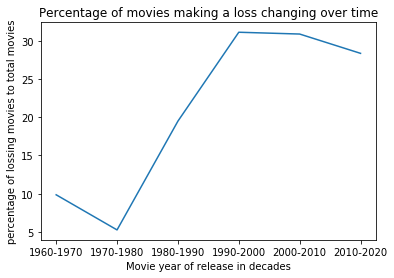

In [23]:
plt.plot(["1960-1970","1970-1980","1980-1990","1990-2000","2000-2010","2010-2020"], percentage_of_lossing_movies)
plt.title("Percentage of movies making a loss changing over time")
plt.xlabel("Movie year of release in decades")
plt.ylabel("percentage of lossing movies to total movies");

-Percentage of movies making a loss to total movies released seem to have increased

### Research Question 3:
#### Is there a relationship between vote average and profits?
>First: use `df_budget_adj` dataframe and calculate 10 percentiles for dataframe

In [24]:
df_budget_adj["vote_group"] = pd.qcut(df_budget_adj.vote_average, 10,
       labels = ["2.2/5.2","5.2/5.5","5.5/5.8","5.8/6.0","6.0/6.2","6.2/6.4","6.4/6.6","6.6/6.8","6.8/7.2","7.2/8.4"])
df_budget_adj

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit_percentage,release_decade,vote_group
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,909.019207,2010,6.4/6.6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,152.290903,2010,6.8/7.2
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,168.398365,2010,6.2/6.4
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,934.089113,2010,7.2/8.4
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015,692.762821,2010,7.2/8.4
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,7.2,2015,294.778150,2010,6.8/7.2
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,5.8,2015,184.260346,2010,5.5/5.8
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,7.6,2015,451.278075,2010,7.2/8.4
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,6.5,2015,1463.149949,2010,6.4/6.6
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,8.0,2015,387.833491,2010,7.2/8.4


>Second: group the dataframe by `vote_group` column and calculate the median profit for each group

In [25]:
df_groupedby_vote = df_budget_adj.groupby("vote_group")["profit_percentage"].median()
df_groupedby_vote

vote_group
2.2/5.2     -2.249634
5.2/5.5     51.770566
5.5/5.8     62.364271
5.8/6.0     86.248484
6.0/6.2    110.034829
6.2/6.4    123.093223
6.4/6.6    133.495996
6.6/6.8    142.755050
6.8/7.2    242.782848
7.2/8.4    332.543877
Name: profit_percentage, dtype: float64

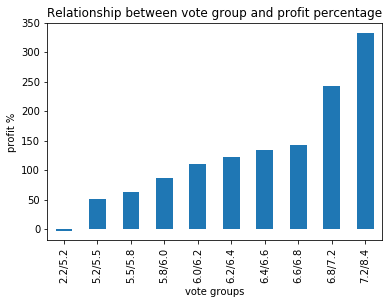

In [26]:
df_groupedby_vote.plot(kind = "bar");
plt.title("Relationship between vote group and profit percentage")
plt.xlabel("vote groups")
plt.ylabel("profit %");

-There seems to be a strong relationship between profits and votes

### Research Question 4:
#### What is the most popular month for movie releases?
>First: convert `release_date` column into a datetime object

In [27]:
df["release_date"] = pd.to_datetime(df.release_date)
df.release_date

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

>Second: group the dataframe by release date months and then calculate the frequency for each month

In [28]:
#creating a release_date_month column
df["release_date_month"] = df.release_date.dt.month

#grouping by release_date_month column and calculating count (frequency) for each month
df_groupedby_month = df.groupby("release_date_month")["id"].count()
df_groupedby_month

release_date_month
1      919
2      691
3      822
4      797
5      809
6      827
7      799
8      918
9     1331
10    1153
11     814
12     985
Name: id, dtype: int64

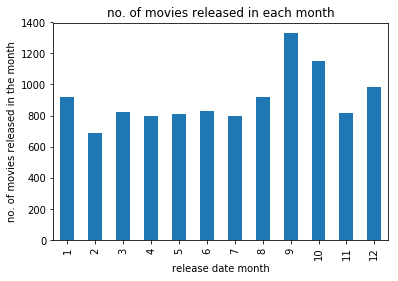

In [29]:
df_groupedby_month.plot(kind = "bar")
plt.xlabel("release date month")
plt.ylabel("no. of movies released in the month")
plt.title("no. of movies released in each month");

-Sebtember seems to be the most month in which movies are released

In [37]:
df_runtime_adj[df_runtime_adj.runtime < 10]["release_decade"].value_counts()

2010    57
2000    35
1980     6
1960     4
1990     2
1970     1
Name: release_decade, dtype: int64

<a id='conclusions'></a>
## Conclusions

> While exploring the change of the runtime of movies over the years:
* The dataframe was filtered from rows with runtime equals 0 to not affect the median and analysis
* A new column was added `release_decade` to demonstrate the change in runtimes over the years
* __conclusion:__ there seems to be a decrease in the runtime of movies year after year

> While investigating the change in the percentages of movies making a loss over the years:
* The dataframe was filtered from rows with budgets and revenues equaling 0 to make sure that the movies were really making a loss and not just because the data was missing
* A new column was added `profit_percentage` to demonstrate loss or gains in profits
* __conclusion:__ the data seems to show a increase in the percentage of movies making losses than in the past years

> While investigating the relationship between votes and profits:
* The dataframe was grouped by vote_average percentiles
* __conclusion:__ the data shows a strong corrolation between vote averages and profit percentages
* Further cleaning of outliers in profits should be done for accurate results and vote groups could be narrower.

> While investigating the most popular month for movie releases:
* the month of september seems to be the most popular
* Further analysis could be done to check if the most popular monthes have changed with time


### Limitations
> In analysis of Question 1 (The change in runtime of movies over the years):
* The last two decades (2000-2010 & 2010-2020 ) contain very many movies with very short runtimes ( < 30 minutes)
* This could be an indication of the increase in the production of short movies in later years or that short movies produced in past years are not included in the dataset or the runtime of these movies maybe wrong or the right unit of measurment was used.
* Therefore cannot decide on treating them as an outlier or keeping them 

In [39]:
#The last two decades (2000-2010 & 2010-2020 ) contain very many movies with very short runtimes ( < 30 minutes)
df_runtime_adj[df_runtime_adj.runtime < 0]["release_decade"].value_counts()

2010    57
2000    35
1980     6
1960     4
1990     2
1970     1
Name: release_decade, dtype: int64

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1